In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [2]:
churnData= pd.read_csv("/Users/irenewalken/Documents/GitHub/IH_RH_DA_FT_AUG_2022/Class_Materials/Machine_Learning/Supervised_Learning/Lab/Data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


**Check the data types**

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Change TotalCharges to numerical values**

In [4]:
churnData["TotalCharges"]= churnData["TotalCharges"].map(lambda x: x.replace(" ",""))

In [5]:
churnData["TotalCharges"] = churnData["TotalCharges"].apply(pd.to_numeric)

**Check if we have NaN values**

In [6]:
churnData.isnull().sum().sum()

11

In [7]:
churnData_nan = churnData[churnData.isna().any(axis=1)]

In [8]:
churnData_nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [9]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Change NaN to median** (because we have too big deviatoin between min and max) 

In [10]:
churnData["TotalCharges"].median()

1397.475

In [11]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].median())

In [12]:
churnData["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [13]:
churnData_numerical = churnData.select_dtypes(include=np.number, exclude=np.object)#get numerical data
churnData_numerical

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_8950/407269510.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  churnData_numerical = churnData.select_dtypes(include=np.number, exclude=np.object)#get numerical data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


## X-y split (y is the target variable, which is the Churn)

In [14]:
churnData["Churn"] = churnData["Churn"].replace(["No","Yes"], [0,1])
churnData["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [15]:
X=churnData_numerical
y=churnData["Churn"]


In [16]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


## Data splitting

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=24)

## Scale the data

In [28]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [29]:
X_train.shape

(5634, 4)

In [30]:
X_test_scaled=std_scaler.transform(X_test)

In [31]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.43803705  0.68651655  0.73801248  0.90908244]
 [-0.43803705 -1.10849144  1.34066493 -0.76308547]
 [-0.43803705 -0.37416999 -1.48447654 -0.79371368]
 ...
 [-0.43803705  1.01288164  0.30849775  0.76512987]
 [-0.43803705  0.72731219  0.97774163  1.16023374]
 [-0.43803705 -0.17019181  0.51826076 -0.01639622]]
--------
[[ 2.28291193 -0.78212635  1.39393807 -0.40449306]
 [-0.43803705  1.25765546  1.32401707  1.90163467]
 [-0.43803705 -0.65973944  0.66309712 -0.39834539]
 ...
 [-0.43803705  0.97208601 -1.33964017 -0.37809551]
 [-0.43803705  1.62481618  1.63033766  2.56086827]
 [-0.43803705  1.05367728 -1.52776097 -0.54939313]]


## Knn Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [33]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
predicted= model.predict(X_test) 
predicted

/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

,Error_metric,Train,Test
0,Accuracy,0.832978,0.794180
1,Precision,0.734528,0.612319
2,Recall,0.594595,0.480114


Confusion matrix for the train set
[[3791  326]
 [ 615  902]]


/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


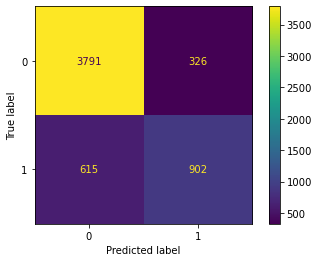



Confusion matrix for the test set
[[950 107]
 [183 169]]


/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


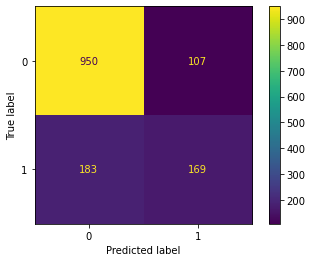

In [35]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model,X_test_scaled,y_test, values_format = 'd')
plt.show()

## Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.788072,0.802697
1,Precision,0.660059,0.656780
2,Recall,0.439024,0.440341


Confusion matrix for the train set
[[3774  343]
 [ 851  666]]


/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


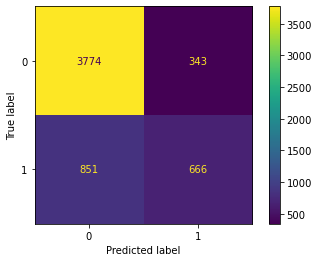



Confusion matrix for the test set
[[976  81]
 [197 155]]


/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


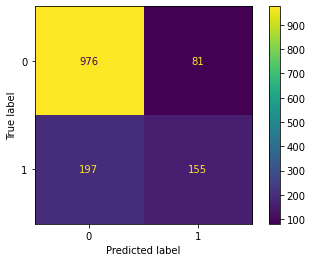

In [36]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()